In [1]:
import pandas as pd
import numpy as np
from multiprocessing import Pool
from functools import partial
import Evaluation_func as func
from tqdm import tqdm_notebook as tqdm
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Customer_Value\data\trading\st_trading_processed.csv')

Sampling

In [3]:
df, sample_id = func.sampling(df, time_period=120, threshold=12, sample_size=150000)
df_sampling = df[df.S_IDNO.isin(sample_id)]

Check Sample Representation

In [5]:
sample = df[(df.sampled_eval == 'Y') & (df.LABEL_CHURN == 'ACTIVE')]
population = df[(df.TRADE == 1) & (df.LABEL_CHURN == 'ACTIVE') & (df.frequency_annual >= 12) & (df['MTH_DATE'] >= '2015-07-07')]

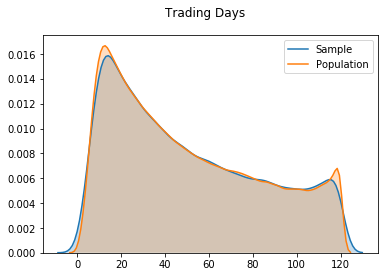

In [6]:
fig = sns.kdeplot(sample['trading_days_total_120_days'], shade=True, legend=False)
fig = sns.kdeplot(population['trading_days_total_120_days'], shade=True, legend=False)
fig.legend(labels=['Sample','Population'])
fig.figure.suptitle("Trading Days", fontsize = 12)
plt.show()

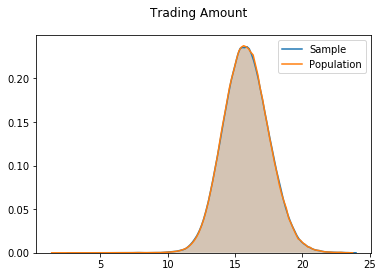

In [7]:
fig = sns.kdeplot(np.log(sample['trading_days_amount_120_days'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(population['trading_days_amount_120_days'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['Sample','Population'])
fig.figure.suptitle("Trading Amount", fontsize = 12)
plt.show()

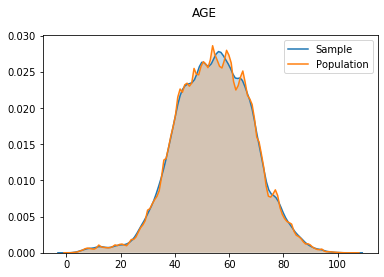

In [8]:
fig = sns.kdeplot(sample['AGE'], shade=True, legend=False)
fig = sns.kdeplot(population['AGE'], shade=True, legend=False)
fig.legend(labels=['Sample','Population'])
fig.figure.suptitle("AGE", fontsize = 12)
plt.show()

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


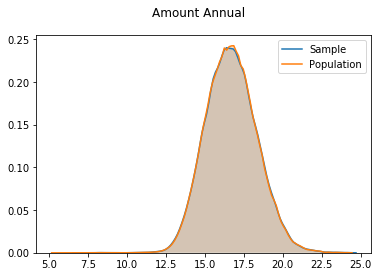

In [9]:
fig = sns.kdeplot(np.log(sample['amount_annual'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(population['amount_annual'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['Sample','Population'])
fig.figure.suptitle("Amount Annual", fontsize = 12)
plt.show()

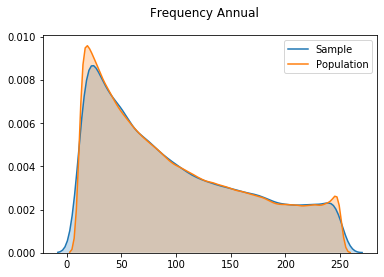

In [11]:
fig = sns.kdeplot(sample['frequency_annual'], shade=True, legend=False)
fig = sns.kdeplot(population['frequency_annual'], shade=True, legend=False)
fig.legend(labels=['Sample','Population'])
fig.figure.suptitle("Frequency Annual", fontsize = 12)
plt.show()

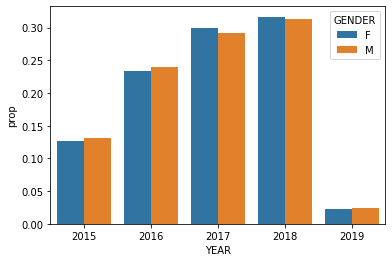

In [12]:
x, y, hue = "YEAR", "prop", "GENDER"
hue_order = ["M", "F"]
prop_df = (population[x]
           .groupby(population[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df)

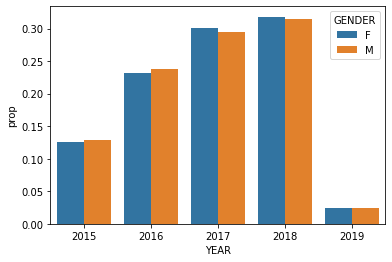

In [13]:
x, y, hue = "YEAR", "prop", "GENDER"
hue_order = ["M", "F"]
prop_df = (sample[x]
           .groupby(sample[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df)

Save data

In [14]:
# df.to_csv(r'D:\Customer_Value\data\st_trading_sampled.csv', index=False)
df_sampling.to_csv(r'D:\Customer_Value\data\evaluate\st_sample_test_large.csv', index=False)

In [ ]:
df = pd.read_csv(r'D:\Customer_Value\data\st_trading_sampled.csv')
df_sampling